##### 您将获得每日历史销售数据。任务是预测测试集在每个商店中出售的产品总数。请注意，商店和产品的清单每月都会略有变化。创建可以处理此类情况的可靠模型是挑战的一部分。


##### 档案说明：
##### sales_train.csv-训练集。2013年1月至2015年10月的每日历史数据。
##### test.csv-测试集。您需要预测这些商店和产品在2015年11月的销售额。
##### sample_submission.csv-格式正确的示例提交文件。
##### items.csv-有关项目/产品的补充信息。
##### item_categories.csv-   有关项目类别的补充信息。
##### shop.csv-有关商店的补充信息。


##### 资料栏位：
##### ID-  代表测试集中的（商店，商品）元组的ID
##### shop_id-商店的唯一标识符
##### item_id-产品的唯一标识符
##### item_category_id-项目类别的唯一标识符
##### item_cnt_day-销售的产品数量。您正在预测该指标的每月金额
##### item_price-商品的当前价格
##### 日期  -格式为dd / mm / yyyy的日期
##### date_block_num-连续的月份号，为方便起见。2013年1月为0,2013年2月为1，...，2015年10月为33
##### item_name-  项目名称
##### shop_name-商店名称
##### item_category_name-项目类别名称

In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

/Users/apple/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/apple/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
df_test = pd.read_csv('test.csv').copy()
df_train = pd.read_csv('sales_train.csv').copy()
items = pd.read_csv('items.csv').copy()
item_categories = pd.read_csv('item_categories.csv').copy()
shops = pd.read_csv('shops.csv').copy()
sample_submission = pd.read_csv('sample_submission.csv').copy()

In [7]:
df_train.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [8]:
df_test.head(5)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [9]:
sample_submission.head(5)

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [10]:
items.head(5)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [11]:
item_categories.head(5)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [12]:
item_categories['item_category_name'][item_categories['item_category_id']==40]

40    Кино - DVD
Name: item_category_name, dtype: object

In [13]:
shops.head(5)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [14]:
df_train.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


# 观察数据

In [15]:
# 每件商品每月销售量
# 每个商店每月销售量

Sale volume outliers: [2169.]
Sale price outliers: [307980.]


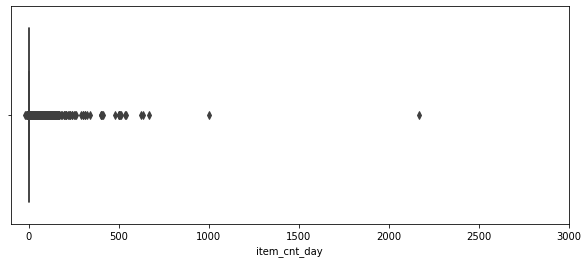

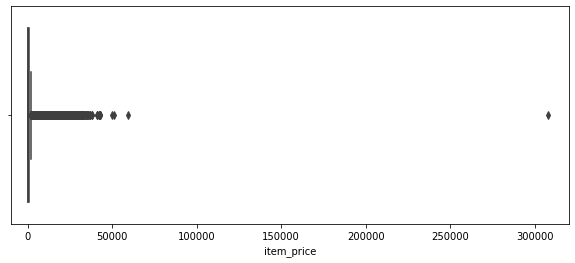

In [16]:
plt.figure(figsize=(10,4))
plt.xlim(-100,3000)
sns.boxplot(x = df_train['item_cnt_day'])
print('Sale volume outliers:',df_train['item_cnt_day'][df_train['item_cnt_day']>1001].unique())
plt.figure(figsize=(10,4))
plt.xlim(-10000,320000)
sns.boxplot(x = df_train['item_price'])
print('Sale price outliers:',df_train['item_price'][df_train['item_price']>300000].unique())

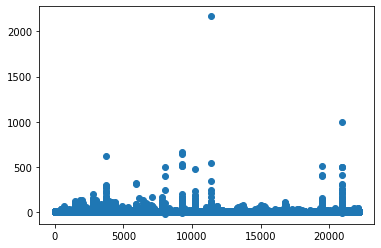

In [17]:
plt.scatter(x=df_train['item_id'], y=df_train['item_cnt_day'])
plt.show()

In [18]:
# 删除异常点，防止过拟合

df_train = df_train.drop(df_train[df_train.item_price < 0].index | df_train[df_train.item_price >= 100000].index)
df_train = df_train.drop(df_train[df_train.item_cnt_day < 0].index | df_train[df_train.item_cnt_day >= 1000].index)

In [19]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0


In [20]:
# 每件商品每月销售量

sales_by_item = df_train.pivot_table(index=['item_id'],columns=['date_block_num'],values=['item_cnt_day'],
                                                   aggfunc=[np.sum], fill_value=0).reset_index()
sales_by_item.columns = sales_by_item.columns.droplevel().droplevel().map(str)
sales_by_item.columns.values[0] = 'item_id'
sales_by_item = sales_by_item.reset_index(drop=True).rename_axis(None, axis=1)

sales_by_item 

,item_id,0,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,32,33
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21798,22165,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21799,22166,0,0,0,0,0,0,0,0,0,...,7,8,12,4,8,10,8,11,5,11
21800,22167,0,0,0,0,0,0,0,0,56,...,33,46,40,38,32,33,34,29,21,37
21801,22168,2,2,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# 每个商店每月的销售量

sales_by_shop = df_train.pivot_table(index=['shop_id'], columns=['date_block_num'], values=['item_cnt_day'],
                                                    aggfunc=[np.sum], fill_value=0).reset_index()
sales_by_shop.columns = sales_by_shop.columns.droplevel().droplevel().map(str)
sales_by_shop.columns.values[0] = 'shop_id'
sales_by_shop = sales_by_shop.reset_index(drop=True).rename_axis(None, axis=1)

sales_by_shop

,shop_id,0,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,32,33
0,0,5578,6127,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2947,3364,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1151,489,756,585,553,832,809,878,949,...,989,916,766,862,846,807,789,943,825,727
3,3,767,801,959,648,718,789,729,891,1031,...,982,739,747,741,734,676,542,668,749,616
4,4,2117,2036,2069,287,1212,1465,1384,1718,1536,...,1192,981,981,902,896,797,844,948,734,831
5,5,0,879,1357,1008,1111,1395,1269,1514,1299,...,1408,1102,1111,1057,1013,955,994,1297,1098,1054
6,6,3699,4017,4528,3174,3027,3853,3368,3709,4222,...,2336,2334,1985,2001,1758,1546,1487,1576,1728,1803
7,7,2498,2516,2464,1541,1648,2089,2032,2399,2600,...,2085,1850,1433,1340,1219,1238,1327,1411,1292,1216
8,8,1463,1156,983,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3188


# 特征工程

In [22]:
# 增加该商店产品历史销售总额
# 增加前6个月该商店销售额为0（说明关闭了）

In [23]:
df_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [24]:
sales_by_item_and_shop = df_train.pivot_table(index=['item_id','shop_id'],columns=['date_block_num'],values=['item_cnt_day'],
                                                   aggfunc=[np.sum], fill_value=0).reset_index()
sales_by_item_and_shop.columns = sales_by_item_and_shop.columns.droplevel().droplevel().map(str)
sales_by_item_and_shop.columns.values[0] = 'item_id'
sales_by_item_and_shop.columns.values[1]= 'shop_id'
sales_by_item_and_shop = sales_by_item_and_shop.reset_index(drop=True).rename_axis(None, axis=1)

sales_by_item_and_shop

,item_id,shop_id,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,32,33
0,0,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,55,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424092,22168,12,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
424093,22168,16,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
424094,22168,42,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
424095,22168,43,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# salessum_by_item_and_shop = sales_by_item_and_shop.loc[:,'0':].sum(axis=1)
# salessum_by_item_and_shop
# salessum_by_item_and_shop = sales_by_item_and_shop.loc['0':].groupby(['item_id','shop_id']).agg('sum')

salessum_by_item_and_shop = pd.DataFrame()
salessum_by_item_and_shop['item_id'] = sales_by_item_and_shop['item_id']
salessum_by_item_and_shop['shop_id'] = sales_by_item_and_shop['shop_id']
salessum_by_item_and_shop['salessum_by_itemshop'] = sales_by_item_and_shop.loc[:,'0':].sum(axis=1)
salessum_by_item_and_shop

,item_id,shop_id,salessum_by_itemshop
0,0,54,1
1,1,55,6
2,2,54,2
3,3,54,2
4,4,54,1
...,...,...,...
424092,22168,12,2
424093,22168,16,1
424094,22168,42,1
424095,22168,43,1


In [26]:
# 增加前6个月该产品销售额是否均为0

sales_by_shop = df_train.pivot_table(index=['shop_id'],columns=['date_block_num'],values=['item_cnt_day'],
                                                   aggfunc=[np.sum], fill_value=0).reset_index()
sales_by_shop.columns = sales_by_shop.columns.droplevel().droplevel().map(str)
sales_by_shop.columns.values[0]= 'shop_id'
sales_by_shop = sales_by_shop.reset_index(drop=True).rename_axis(None, axis=1)

sales_by_shop

,shop_id,0,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,32,33
0,0,5578,6127,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2947,3364,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1151,489,756,585,553,832,809,878,949,...,989,916,766,862,846,807,789,943,825,727
3,3,767,801,959,648,718,789,729,891,1031,...,982,739,747,741,734,676,542,668,749,616
4,4,2117,2036,2069,287,1212,1465,1384,1718,1536,...,1192,981,981,902,896,797,844,948,734,831
5,5,0,879,1357,1008,1111,1395,1269,1514,1299,...,1408,1102,1111,1057,1013,955,994,1297,1098,1054
6,6,3699,4017,4528,3174,3027,3853,3368,3709,4222,...,2336,2334,1985,2001,1758,1546,1487,1576,1728,1803
7,7,2498,2516,2464,1541,1648,2089,2032,2399,2600,...,2085,1850,1433,1340,1219,1238,1327,1411,1292,1216
8,8,1463,1156,983,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3188


In [27]:
zero_by_shop = pd.DataFrame()
zero_by_shop['shop_id'] = sales_by_shop['shop_id']
zero_by_shop['zero_by_shop'] = (sales_by_shop.loc[:,'28':].sum(axis=1)==0).astype(int) 
zero_by_shop

,shop_id,zero_by_shop
0,0,1
1,1,1
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,1
9,9,0


In [174]:
train = pd.merge(df_train, items, how='left')
train.drop('item_name', axis=1, inplace=True)
train = pd.merge(train, salessum_by_item_and_shop, how='left')
train = pd.merge(train, zero_by_shop, how='left')
train.drop('date', axis=1, inplace=True)
train

In [111]:
train.isnull().sum()

date_block_num          0
shop_id                 0
item_id                 0
item_cnt_day            0
item_category_id        0
salessum_by_itemshop    0
zero_by_shop            0
dtype: int64

In [127]:
test = pd.DataFrame()

test = pd.merge(df_test, items, how='left')
test.drop('item_name', axis=1, inplace=True)
test.drop('ID',axis=1,inplace=True)

test = pd.merge(test, salessum_by_item_and_shop, how='left')
test = pd.merge(test, zero_by_shop, how='left')
test.insert(0,'date_block_num',value=34)  # value 也可以dataframe列

test

,date_block_num,shop_id,item_id,item_category_id,salessum_by_itemshop,zero_by_shop
0,34,5,5037,19,13.0,0
1,34,5,5320,55,NaN,0
2,34,5,5233,19,10.0,0
3,34,5,5232,23,1.0,0
4,34,5,5268,20,NaN,0


In [128]:
test.isnull().sum()

date_block_num               0
shop_id                      0
item_id                      0
item_category_id             0
salessum_by_itemshop    102796
zero_by_shop                 0
dtype: int64

In [129]:
test.fillna(0, inplace=True)

In [140]:
train2

,date_block_num,shop_id,item_id,item_cnt_day,item_category_id,salessum_by_itemshop,zero_by_shop
0,0,59,22154,1.0,37,1,0
1,0,25,2552,1.0,58,1,0
2,0,25,2554,1.0,58,1,0
3,0,25,2555,1.0,56,10,0
4,0,25,2564,1.0,59,6,0
...,...,...,...,...,...,...,...
2928480,33,25,7409,1.0,55,3,0
2928481,33,25,7393,1.0,55,10,0
2928482,33,25,7384,1.0,55,15,0
2928486,33,25,7459,1.0,55,26,0


In [131]:
test

,date_block_num,shop_id,item_id,item_category_id,salessum_by_itemshop,zero_by_shop
0,34,5,5037,19,13.0,0
1,34,5,5320,55,0.0,0
2,34,5,5233,19,10.0,0
3,34,5,5232,23,1.0,0
4,34,5,5268,20,0.0,0
...,...,...,...,...,...,...
214195,34,45,18454,55,9.0,0
214196,34,45,16188,64,0.0,0
214197,34,45,15757,55,7.0,0
214198,34,45,19648,40,0.0,0


In [137]:
train2 = train.drop_duplicates(['date_block_num','shop_id','item_id'])
sales = train['item_cnt_day']

In [159]:
train_data1 = pd.pivot_table(df_train, index=['shop_id','item_id','date_block_num'], values=['item_cnt_day'], aggfunc=[np.sum],fill_value=0).reset_index();
train_data1.columns = train_data1.columns.droplevel().map(str)
train_data1 = train_data1.reset_index(drop=True).rename_axis(None, axis=1)
train_data1.columns.values[0]="shop_id";
train_data1.columns.values[1]="item_id";
train_data1.columns.values[2]="month_id";
train_data1.columns.values[3]="item_cnt_month";
train_data1

,shop_id,item_id,month_id,item_cnt_month
0,0,30,1,31
1,0,31,1,11
2,0,32,0,6
3,0,32,1,10
4,0,33,0,3
...,...,...,...,...
1608219,59,22164,27,2
1608220,59,22164,30,1
1608221,59,22167,9,1
1608222,59,22167,11,2


In [163]:
import itertools

matrix = []
cols = ['month_id','shop_id','item_id']
for i in range(34):
    sales = df_train[df_train.date_block_num==i]
    matrix.append(np.array(list(itertools.product([i], sales.shop_id.unique(), sales.item_id.unique())), dtype='int16'))
matrix = pd.DataFrame(np.vstack(matrix), columns=cols)
matrix['month_id'] = matrix['month_id'].astype(np.int8)
matrix['shop_id'] = matrix['shop_id'].astype(np.int8)
matrix['item_id'] = matrix['item_id'].astype(np.int16)


train_data1 = pd.pivot_table(df_train, index=['shop_id','item_id','date_block_num'], values=['item_cnt_day'], aggfunc=[np.sum],
fill_value=0).reset_index();
train_data1.columns = train_data1.columns.droplevel().map(str)
train_data1 = train_data1.reset_index(drop=True).rename_axis(None, axis=1)
train_data1.columns.values[0]="shop_id";
train_data1.columns.values[1]="item_id";
train_data1.columns.values[2]="month_id";
train_data1.columns.values[3]="item_cnt_month";

#合并matrix和train_data1数据
train_data1 = pd.merge(matrix, train_data1, on=["shop_id", "item_id", "month_id"], how='left')
train_data1['item_cnt_month'] = (train_data1['item_cnt_month'].fillna(0).astype(np.float16))
train_data1["month_id1"] = train_data1["month_id"] % 12;
train_data1
# print(train_data1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10884508 entries, 0 to 10884507
Data columns (total 5 columns):
month_id          int8
shop_id           int8
item_id           int16
item_cnt_month    float16
month_id1         int8
dtypes: float16(1), int16(1), int8(3)
memory usage: 155.7 MB
None


In [164]:
train_data1

,month_id,shop_id,item_id,item_cnt_month,month_id1
0,0,59,22154,1.0,0
1,0,59,2552,0.0,0
2,0,59,2554,0.0,0
3,0,59,2555,0.0,0
4,0,59,2564,0.0,0
...,...,...,...,...,...
10884503,33,21,7635,0.0,9
10884504,33,21,7638,0.0,9
10884505,33,21,7640,0.0,9
10884506,33,21,7632,0.0,9


In [172]:
train_data2 = pd.pivot_table(df_train, index=['shop_id','item_id','date_block_num'], values=['item_cnt_day'], aggfunc=[np.sum],
fill_value=0).reset_index();
train_data2.columns = train_data2.columns.droplevel().map(str)
train_data2 = train_data2.reset_index(drop=True).rename_axis(None, axis=1)
train_data2.columns.values[0]="shop_id";
train_data2.columns.values[1]="item_id";
train_data2.columns.values[2]="month_id";
train_data2.columns.values[3]="item_cnt_month1";
train_data2["month_id"] = train_data2["month_id"] + 1;

item_price1 = pd.pivot_table(df_train, index=['item_id','date_block_num'], values=['item_price'], aggfunc=[np.mean], fill_value=
0).reset_index();
item_price1.columns = item_price1.columns.droplevel().map(str)
item_price1 = item_price1.reset_index(drop=True).rename_axis(None, axis=1)
item_price1.columns.values[0]="item_id";
item_price1.columns.values[1]="month_id";
item_price1.columns.values[2]="item_mean_price1";
item_price1["month_id"] = item_price1["month_id"] + 1;

shop_cnt = pd.pivot_table(train_data1, index=['shop_id','month_id'], values=['item_cnt_month'], aggfunc=[np.mean], fill_value=0).reset_index();
shop_cnt.columns = shop_cnt.columns.droplevel().map(str)
shop_cnt = shop_cnt.reset_index(drop=True).rename_axis(None, axis=1)
shop_cnt.columns.values[0]="shop_id";
shop_cnt.columns.values[1]="month_id";
shop_cnt.columns.values[2]="shop_cnt_month1";
shop_cnt["month_id"] = shop_cnt["month_id"] + 1;

item_cnt = pd.pivot_table(train_data1, index=['item_id','month_id'], values=['item_cnt_month'], aggfunc=[np.mean], fill_value=0).reset_index();
item_cnt.columns = item_cnt.columns.droplevel().map(str)
item_cnt = item_cnt.reset_index(drop=True).rename_axis(None, axis=1)
item_cnt.columns.values[0]="item_id";
item_cnt.columns.values[1]="month_id";
item_cnt.columns.values[2]="item_total_month1";
item_cnt["month_id"] = item_cnt["month_id"] + 1;


combined_data = train_data1.append(df_test);
#合并上述的五个特征到训练集中
combined_data = pd.merge(combined_data, train_data2, on = ['shop_id', 'item_id','month_id'], how = 'left')
combined_data["item_cnt_month1"].fillna(0, inplace=True)

combined_data = pd.merge(combined_data, item_price1, on = ['item_id','month_id'], how = 'left')
combined_data["item_mean_price1"].fillna(0, inplace=True)

combined_data = pd.merge(combined_data, shop_cnt, on = ['shop_id','month_id'], how = 'left')
combined_data["shop_cnt_month1"].fillna(0, inplace=True)

combined_data = pd.merge(combined_data, item_cnt, on = ['item_id', 'month_id'], how = 'left')
combined_data["item_total_month1"].fillna(0, inplace=True)

combined_data = pd.merge(combined_data, items, on = ['item_id'], how = 'left')
combined_data["item_category_id"].fillna(0, inplace=True)

combined_data

,ID,item_cnt_month,item_id,month_id,month_id1,shop_id,item_cnt_month1,item_mean_price1,shop_cnt_month1,item_total_month1,item_name,item_category_id
0,NaN,1.0,22154,0.0,0.0,59,0.0,0.0,0.0,0.0,ЯВЛЕНИЕ 2012 (BD),37
1,NaN,0.0,2552,0.0,0.0,59,0.0,0.0,0.0,0.0,DEEP PURPLE The House Of Blue Light LP,58
2,NaN,0.0,2554,0.0,0.0,59,0.0,0.0,0.0,0.0,DEEP PURPLE Who Do You Think We Are LP,58
3,NaN,0.0,2555,0.0,0.0,59,0.0,0.0,0.0,0.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56
4,NaN,0.0,2564,0.0,0.0,59,0.0,0.0,0.0,0.0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59
...,...,...,...,...,...,...,...,...,...,...,...,...
11098703,214195.0,NaN,18454,NaN,NaN,45,0.0,0.0,0.0,0.0,СБ. Союз 55,55
11098704,214196.0,NaN,16188,NaN,NaN,45,0.0,0.0,0.0,0.0,Настольная игра Нано Кёрлинг,64
11098705,214197.0,NaN,15757,NaN,NaN,45,0.0,0.0,0.0,0.0,НОВИКОВ АЛЕКСАНДР Новая коллекция,55
11098706,214198.0,NaN,19648,NaN,NaN,45,0.0,0.0,0.0,0.0,ТЕРЕМ - ТЕРЕМОК сб.м/ф (Регион),40


# 建模

In [155]:
y = train['item_cnt_day']
x = train.drop('item_cnt_day',axis=1)
X = x.drop_duplicates()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

ValueError: Found input variables with inconsistent numbers of samples: [1608224, 2928489]

In [35]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import PolynomialFeatures 
# from sklearn.linear_model import LogisticRegression
# from sklearn.decomposition import PCA

# def PolynomialLogisticRegression(degree=2, n_components=0.9, C=0.1, penalty='l2', solver='liblinear'):
#     return Pipeline([
#             ("poly", PolynomialFeatures(degree=degree)),
#             ("std_scalert", StandardScaler()),
#             ("pca", PCA(n_components=n_components)),
#             ("log_reg", LogisticRegression(C=C,penalty=penalty,solver=solver))
#     ] )

In [36]:
# from sklearn.model_selection import GridSearchCV
# param_grid = [
#     {
#         'poly__degree': [i for i in range(1,3)],
#         'log_reg__C': [i for i in np.arange(0.1,0.8,0.1)],
#         'log_reg__penalty':['l1','l2'],
#         'pca__n_components':[0.9, 0.95]
#     }
# ]

# poly_logistic_reg2 = PolynomialLogisticRegression()
# grid_search = GridSearchCV(poly_logistic_reg2, param_grid, verbose=2, cv=3) # cv是交叉验证分成多少分
# grid_search.fit(X_train, y_train)

In [37]:
# grid_search.best_params_
# grid_search.best_score_
# log_reg = grid_search.best_estimator_

In [142]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

bagging_reg = BaggingRegressor(DecisionTreeRegressor(), 
#                                                n_estimators=500, max_samples=100,
                                               bootstrap=True, oob_score=True, 
                                                n_jobs=-1)

bagging_reg.fit(X, y)

KeyboardInterrupt: 

In [58]:
bagging_reg.oob_score_

0.20111689201516858

In [60]:
X.shape

(2928489, 7)

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

# poly = PolynomialFeatures(degree=1)
# poly.fit(X_train)
# X_train2 = poly.transform(X_train)
# X_test2  = poly.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [148]:
lin_reg.score(X_test, y_test)

0.039826088537315396

In [65]:
lin_reg.score(X_test2, y_test)

0.11418384658403992

In [66]:
X.shape

(2928489, 7)

In [75]:
X2 = X.groupby[](['date_block_num','shop_id','item_id']).sum()
X.values

array([[0.0000e+00, 5.9000e+01, 2.2154e+04, ..., 3.7000e+01, 1.0000e+00,
        0.0000e+00],
       [0.0000e+00, 2.5000e+01, 2.5520e+03, ..., 5.8000e+01, 1.0000e+00,
        0.0000e+00],
       [0.0000e+00, 2.5000e+01, 2.5540e+03, ..., 5.8000e+01, 1.0000e+00,
        0.0000e+00],
       ...,
       [3.3000e+01, 2.5000e+01, 7.4590e+03, ..., 5.5000e+01, 2.6000e+01,
        0.0000e+00],
       [3.3000e+01, 2.5000e+01, 7.4400e+03, ..., 5.7000e+01, 4.0000e+00,
        0.0000e+00],
       [3.3000e+01, 2.5000e+01, 7.4600e+03, ..., 5.5000e+01, 2.0000e+01,
        0.0000e+00]])

In [69]:
X

,date_block_num,shop_id,item_id,item_price,item_category_id,salessum_by_itemshop,zero_by_shop
0,0,59,22154,999.00,37,1,0
1,0,25,2552,899.00,58,1,0
2,0,25,2554,1709.05,58,1,0
3,0,25,2555,1099.00,56,10,0
4,0,25,2564,349.00,59,6,0
...,...,...,...,...,...,...,...
2928484,33,25,7409,299.00,55,3,0
2928485,33,25,7460,299.00,55,20,0
2928486,33,25,7459,349.00,55,26,0
2928487,33,25,7440,299.00,57,4,0


In [70]:
X

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648
